# Análisis estadístico del ruido

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

In [2]:
imgs = []
img_fnames = glob('./imgs-ruido/*.jpg')
for fname in img_fnames:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if img.shape[0] > img.shape[1]:
        img = cv2.transpose(img)
    imgs.append(img)

print("Se cargaron {0} imágenes".format(len(imgs)))


Se cargaron 10 imágenes


In [3]:
print("Menor intensidad =", np.min([imgs]))
print("Mayor intensidad =", np.max([imgs]))

Menor intensidad = 1
Mayor intensidad = 30


In [4]:
## media y desvio std
imgs_np = np.stack(imgs)
img_media = np.mean(imgs_np, axis=0)
img_std = np.std(imgs_np, axis=0)

In [5]:
def dibujar_contorno(title, axs, mat):
    X, Y = np.meshgrid(range(len(mat[0])), range(len(mat)))
    Z = mat

    # decimación para no matar la compu calculando contornos!
    dec = 16

    cp = axs.contourf(X[::dec], Y[::dec], Z[::dec])
    axs.set_title(title)
    fig.colorbar(cp, ax=axs)

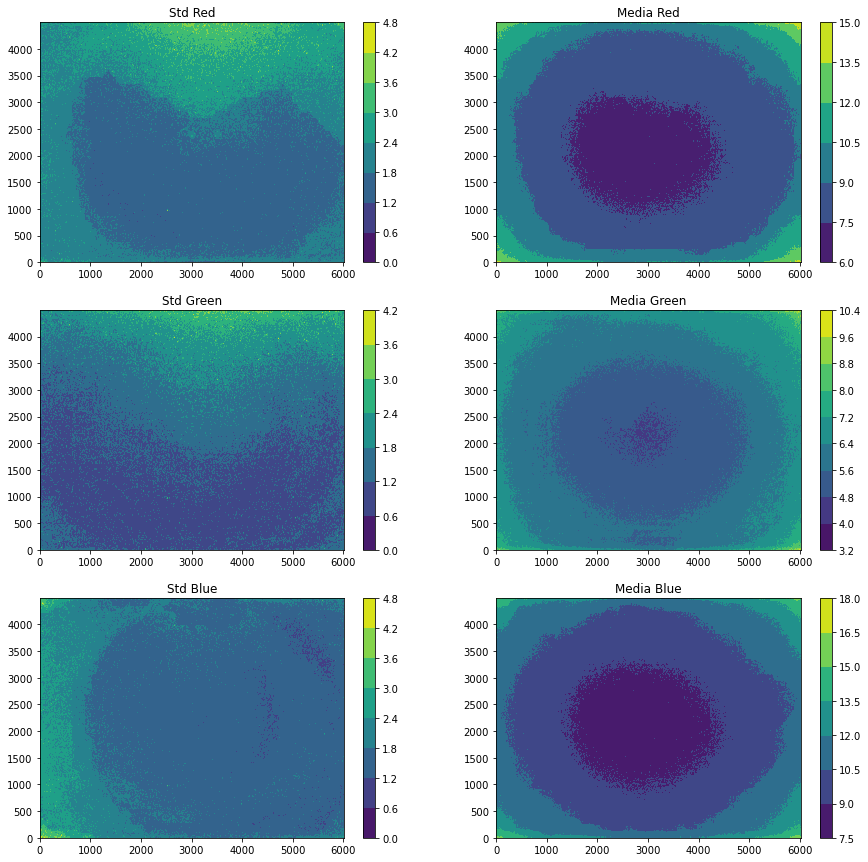

In [6]:
fig, axs = plt.subplots(3, 2,figsize=(15,15))

for channel, number in [('Red',0), ('Green',1), ('Blue',2)]:
    dibujar_contorno('Std ' + channel,axs[number,0], img_std[:,:,number])
    dibujar_contorno('Media ' + channel, axs[number,1], img_media[:,:,number])

plt.show()

Analizando los gráficos de la media, se observa que el ruido que se está incorporando en las fotos obtenidas con este sensor en promedio son:
- 15 niveles de intensidad para el color **rojo**.
- 11 niveles de intensidad para el color **verde**.
- 18 niveles de intensidad para el color **azul**.

Respecto a la forma del ruido, dado que se realizó en una habitación completamente oscura y separando lo mas posible la cámara de la luz producida por la pantalla del celular, se asume que se debe a un efecto de viñetado.

# Estadísticas de ruido: relación entre media y desvío

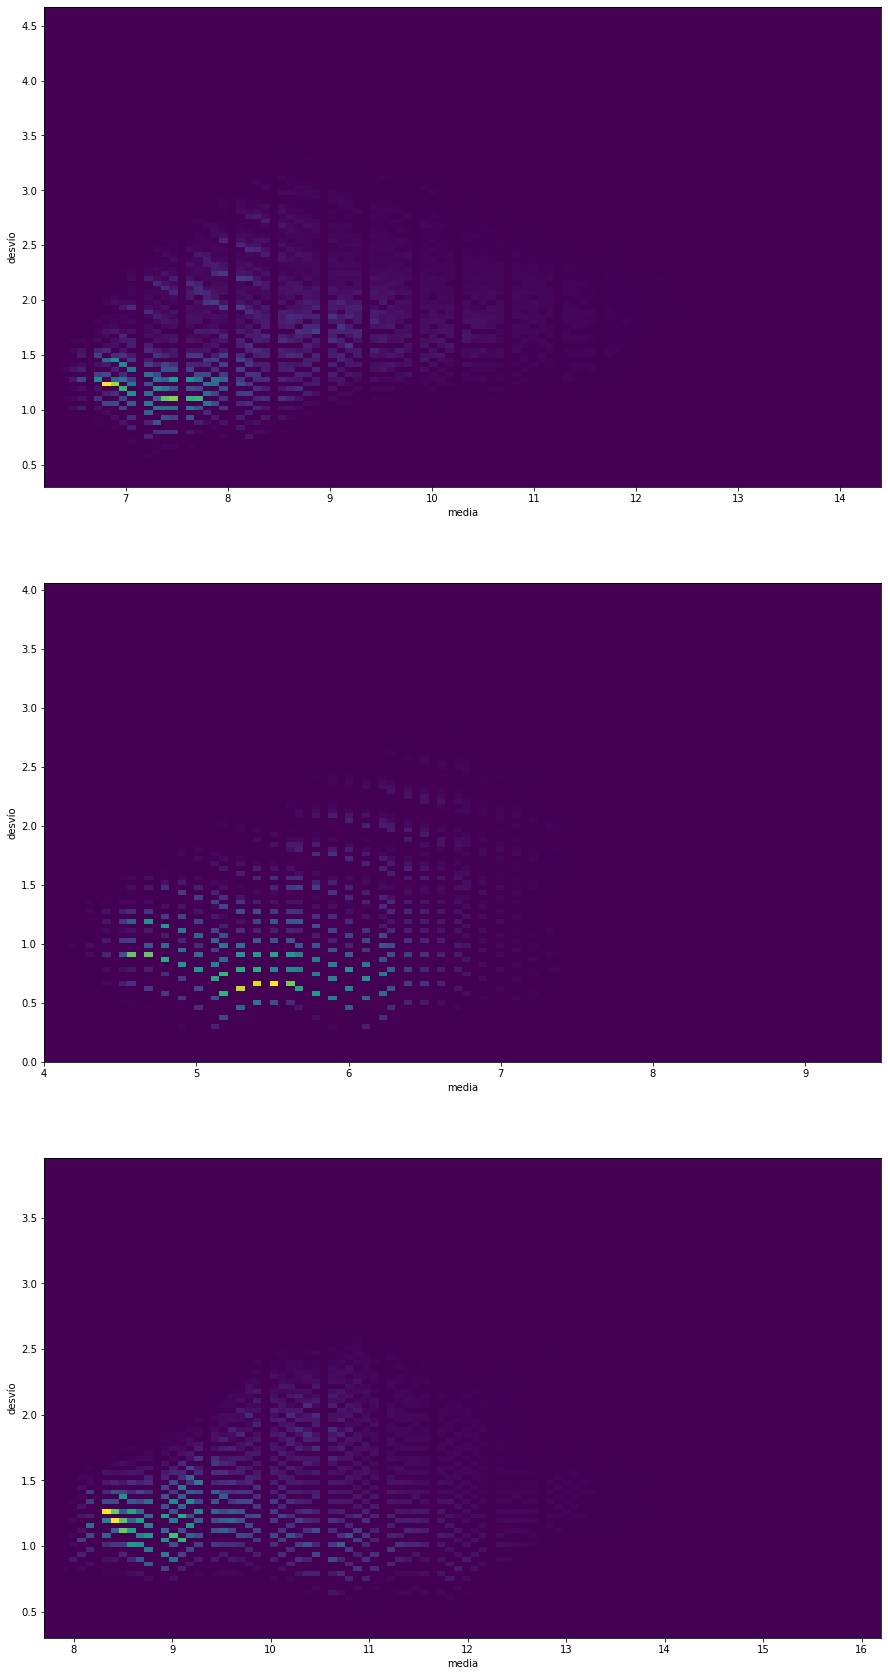

In [7]:
fig, axs = plt.subplots(3, 1, figsize=(15,30))

dec = 100

todos_los_rojos_std = np.ravel(img_std[:,:,0])
todos_los_rojos_media = np.ravel(img_media[:,:,0])

todos_los_verdes_std = np.ravel(img_std[:,:,1])
todos_los_verdes_media = np.ravel(img_media[:,:,1])

todos_los_azules_std = np.ravel(img_std[:,:,2])
todos_los_azules_media = np.ravel(img_media[:,:,2])

axs[0].set(xlabel='media' , ylabel='desvío')
cb = axs[0].hist2d(todos_los_rojos_media[::dec], todos_los_rojos_std[::dec], bins=100)

axs[1].set(xlabel='media' , ylabel='desvío')
cb = axs[1].hist2d(todos_los_verdes_media[::dec], todos_los_verdes_std[::dec], bins=100)

axs[2].set(xlabel='media' , ylabel='desvío')
cb = axs[2].hist2d(todos_los_azules_media[::dec], todos_los_azules_std[::dec], bins=100)

plt.show()

Se observa que, a diferencia del ejemplo visto en clase, el desvío se mantiene relativamente constante a medida que aumenta la media.

# Histograma

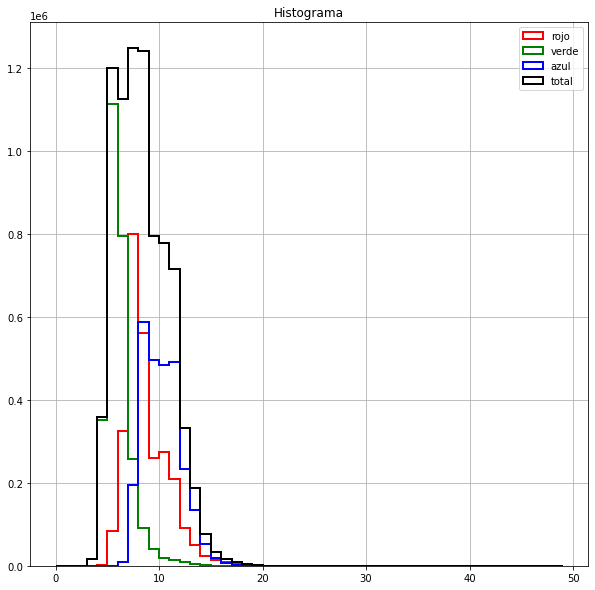

In [8]:
dec = 100
plt.figure(figsize=(10,10))
plt.title('Histograma')
todos_los_rojos = np.ravel(imgs_np[:,:,:,0])
todos_los_verdes = np.ravel(imgs_np[:,:,:,1])
todos_los_azules = np.ravel(imgs_np[:,:,:,2])
plt.grid()
i_max = 50
_ = plt.hist(todos_los_rojos[::dec], bins=range(i_max), color='red',histtype='step', linewidth=2.0)
_ = plt.hist(todos_los_verdes[::dec], bins=range(i_max), color='green', histtype='step', linewidth=2.0)
_ = plt.hist(todos_los_azules[::dec], bins=range(i_max), color='blue', histtype='step', linewidth=2.0)

_ = plt.hist(np.ravel(imgs_np)[::dec], bins=range(i_max), color='black', histtype='step', linewidth=2.0)
plt.legend(['rojo', 'verde', 'azul', 'total'])

Se observa que la distribución de ruido no es perfectamente Gaussiana, adicionalmente, para los diferentes canales:
- La campana del canal **verde** es la mas asimétrica de todas con su media mas cercana al valor **0**.
- La campana del canal **rojo** no es tan asimétrica como la del canal **verde** con su media cercana al valor **8**.
- La campana del canal **azul** es menos asimétrica que la del canal **rojo** con su media cercana al valor **9**.